### Linear Regression

Implementation of Ordinary Least Squares for Linear Regression

In [1]:
import sklearn.datasets
import itertools
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mp
import time
from sklearn.model_selection import train_test_split

MAX = 9999999

In [2]:
def ordinary_least_squares(X, y):
    return np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)

In [3]:
def find_subsets(S, m):
    return list(itertools.combinations(S, m))


def rss(X, y):
    X = np.insert(X, 0, 1, axis=1)
    beta = ordinary_least_squares(X, y)
    return np.dot((np.dot(X, beta) - y).T, np.dot(X, beta) - y)


def best_subset_selection(X, y, c='b'):
    points = []
    nr_features = X.shape[1]

    for i in range(1, nr_features + 1):
        best_i = min([rss(X[:, column_idx], y) for column_idx in find_subsets(range(nr_features), i)])
        points.append(best_i)

    best = min(points)
    plt.plot(list(range(1, nr_features + 1)), points, marker='o', color=c, linestyle='-')

    return best

Implementation of subset selection using a greedy method

In [4]:
def stepwise_forward_subset(X, y, c='g'):
    p = X.shape[1]
    best_rss = MAX
    best_subset = []
    subset = []
    points = []

    for i in range(1, p + 1):
        best_sub_rss = MAX
        best_sub_subset = []
        best_elem = None
        for x in range(0, p):
            if x not in subset:
                current_rss = rss(X[:, subset + [x]], y)
                if best_sub_rss > current_rss:
                    best_sub_rss = current_rss
                    best_sub_subset = subset + [x]
                    best_elem = x
        if best_rss > best_sub_rss:
            best_rss = best_sub_rss
            best_subset = best_sub_subset
        subset.append(best_elem)
        points.append(best_sub_rss)

    plt.plot(list(range(1, p + 1)), points, marker='*', color=c, linestyle='-')
    print("subset with least rss:", best_subset)
    return best_rss

Add quadratic features and apply the same methods.

In [5]:
def get_products(X):
    res = []
    for i, j in find_subsets(range(0, X.shape[1]), 2):
        res.append(np.multiply(X[:, [i]], X[:, [j]]))
    return res


def plot_features():
    dataset = sklearn.datasets.load_diabetes()
    X = np.array(dataset['data'])
    y = np.array(dataset['target'])

    start_best_subset = time.time()
    print(best_subset_selection(X, y))
    print("running time: ", time.time()-start_best_subset)

    start_stepwise = time.time()
    print(stepwise_forward_subset(X, y))
    print("running time: ", time.time() - start_stepwise)

    start_quadr = time.time()
    l = get_products(X)
    for l1 in l:
        X = np.hstack((X, np.array(l1)))

    print(stepwise_forward_subset(X, y, 'r'))
    print("running time: ", time.time() - start_quadr)

    plt.legend(
        handles=[
            mp.Patch(color='green', label='Stepwise Forward Selection'),
            mp.Patch(color='blue', label='Best Subset Selection'),
            mp.Patch(color='red', label='Stepwise Transformed Features')])
    plt.show()

1263983.15626
running time:  0.16912031173706055
subset with least rss: [2, 8, 3, 4, 1, 5, 7, 9, 6, 0]
1263983.15626
running time:  0.024016141891479492
subset with least rss: [2, 8, 3, 10, 27, 6, 1, 18, 15, 17, 13, 9, 48, 42, 46, 47, 4, 53, 23, 51, 20, 40, 39, 19, 16, 34, 37, 22, 41, 28, 33, 43, 36, 0, 26, 12, 54, 44, 7, 31, 14, 50, 5, 29, 49, 32, 30, 52, 24, 21, 25, 38, 35, 45, 11]
1088977.51032
running time:  0.36686182022094727


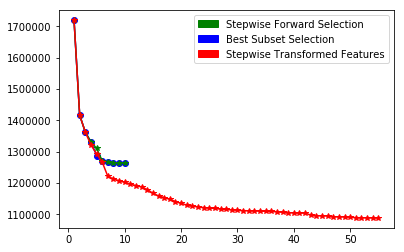

In [6]:
plot_features()